# **Proyek Analisis Data: Air Quality Guanyuan**


*   Nama : Muhammad Faqih Hakim
*   Email : mhmdfkih21@gmail.com
*   Dicoding ID :



# **Menentukan Pertanyaan Bisnis**

*   Apakah ada perbedaan Yang signifikan dalam kadar polutan (PM2.5, PM10, SO2, NO2, CO, O3) antara bulan-bulan atau musim tertentu?

*   Apakah ada hubungan yang kuat antara arah angin dan kecepatan angin dengan konsentrasi polutan?

*   Bagaimana curah hujan mempengaruhi kadar polutan, terutama PM2.5 dan PM10?

*   Pada jam Berapakah yang biasanya menunjukkan Puncak Konsentreasi PM2.5, PM10, NO2, SO2, CO tertinggi?

* Bagaimana PM2.5, PM10, NO2, SO2, dan CO mempengaruhi O3

#  **Import Library Yang Digunakan**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Wragling**

**Gathering data**

In [2]:
guanyuan_df = pd.read_csv('./PRSA_Data_Guanyuan_20130301-20170228.csv')
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


**Assessing Data**

In [3]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Chek Apakah ada Data yang Null

In [4]:
guanyuan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


Cek Data yang Terduplikasi


In [5]:
guanyuan_df.duplicated().sum()

0

In [6]:
guanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Uraian Proses Assesing data:


1.   Terdapat data yang masih Null yakni, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WD, DAN WSPM
Pada langkah selanjutnya (cleaning Data) ganti nilai Null menjadi Nilai Yang paling Banyak Muncul


**Cleaning Data**

In [7]:
guanyuan_df["PM2.5"].value_counts()

PM2.5
11.0     574
12.0     566
10.0     550
14.0     538
9.0      517
        ... 
136.2      1
256.9      1
477.0      1
14.3       1
663.0      1
Name: count, Length: 557, dtype: int64

In [8]:
guanyuan_df.PM10.value_counts()

PM10
18.0     312
14.0     303
25.0     300
20.0     292
24.0     291
        ... 
62.9       1
961.0      1
483.0      1
647.0      1
564.0      1
Name: count, Length: 630, dtype: int64

In [9]:
guanyuan_df.SO2.value_counts()

SO2
2.0000      7349
3.0000      2326
4.0000      1912
5.0000      1683
6.0000      1498
            ... 
92.2488        1
97.3896        1
113.3832       1
100.2456       1
293.0000       1
Name: count, Length: 280, dtype: int64

In [10]:
guanyuan_df.NO2.value_counts()

NO2
28.0000     491
30.0000     486
21.0000     481
29.0000     473
26.0000     465
           ... 
19.0929       1
22.3777       1
20.9406       1
18.6823       1
208.0000      1
Name: count, Length: 376, dtype: int64

In [11]:
guanyuan_df.CO.value_counts()

CO
400.0     2417
300.0     2341
600.0     2330
500.0     2299
700.0     2218
          ... 
6799.0       1
9600.0       1
4299.0       1
9900.0       1
6299.0       1
Name: count, Length: 117, dtype: int64

In [12]:
guanyuan_df.O3.value_counts()

O3
2.0000      4819
1.0000      1144
3.0000       692
4.0000       564
5.0000       427
            ... 
147.5838       1
171.7884       1
212.4864       1
220.8402       1
415.0000       1
Name: count, Length: 767, dtype: int64

In [13]:
guanyuan_df.TEMP.value_counts()

TEMP
 3.0000     249
 1.0000     240
 2.0000     203
 0.0000     196
-1.0000     186
           ... 
 10.4750      1
 11.8125      1
 10.2600      1
 9.2750       1
-0.6250       1
Name: count, Length: 967, dtype: int64

In [14]:
guanyuan_df.PRES.value_counts()

PRES
1023.00    256
1019.00    252
1024.00    249
1025.00    248
1020.00    239
          ... 
1036.40      1
1038.30      1
1039.80      1
1040.90      1
1034.25      1
Name: count, Length: 600, dtype: int64

In [15]:
guanyuan_df.DEWP.value_counts()

DEWP
 17.6    143
 17.0    133
 17.2    129
 18.8    128
 17.8    126
        ... 
-31.4      1
-31.1      1
-30.8      1
-28.7      1
-28.9      1
Name: count, Length: 604, dtype: int64

In [16]:
guanyuan_df.RAIN.value_counts()

RAIN
0.0     33664
0.1       314
0.2       161
0.3       107
0.5        73
        ...  
12.9        1
13.6        1
4.2         1
5.0         1
5.1         1
Name: count, Length: 127, dtype: int64

In [17]:
guanyuan_df.wd.value_counts()

wd
NE     5140
ENE    3950
SW     3359
E      2608
NNE    2445
WSW    2212
SSW    2098
N      2066
NW     1860
ESE    1717
NNW    1589
SE     1341
S      1304
W      1171
WNW    1101
SSE    1022
Name: count, dtype: int64

In [18]:
guanyuan_df.WSPM.value_counts()

WSPM
1.2    1891
1.1    1842
1.0    1747
1.3    1640
0.9    1604
       ... 
8.5       1
9.2       1
8.8       1
8.9       1
8.6       1
Name: count, Length: 91, dtype: int64

In [19]:
guanyuan_df.station.value_counts()

station
Guanyuan    35064
Name: count, dtype: int64

NILAI TERBANYAK NYA ANTARA LAIN:
* PM2.5 = 11.0  
* PM10 = 18.0
* SO2 = 2.0000      
* NO2 = 28.0000
* CO = 400.0
* O3 = 2.0000   
* TEMP = 3.0000
* PRES = 1023.00
* DEWP = 17.6
* RAIN = 0.0
* wd = NE
* WSPM = 1.2



In [20]:
guanyuan_df["PM2.5"].fillna(value=11, inplace=True)
guanyuan_df.PM10.fillna(value=18, inplace=True)
guanyuan_df.SO2.fillna(value=2, inplace=True)
guanyuan_df.NO2.fillna(value=28, inplace=True)
guanyuan_df.CO.fillna(value=400, inplace=True)
guanyuan_df.O3.fillna(value=2, inplace=True)
guanyuan_df.TEMP.fillna(value=3, inplace=True)
guanyuan_df.PRES.fillna(value=1023, inplace=True)
guanyuan_df.DEWP.fillna(value=17.6, inplace=True)
guanyuan_df.RAIN.fillna(value=0, inplace=True)
guanyuan_df.wd.fillna(value="NE", inplace=True)
guanyuan_df.WSPM.fillna(value=1.2, inplace=True)

In [21]:
guanyuan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Data sudah di Cleaning selanjutnya tinggal kita explore

# **Exploratory Data Analysis (EDA)**

**Explore**

In [22]:
guanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,81.669655,107.909654,17.380181,57.339665,1227.734628,53.995433,13.578570,1011.853281,3.131320,0.067383,1.708293
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.774148,91.560222,23.509348,35.054943,1151.132241,57.290628,11.398647,10.404487,13.689356,0.909798,1.203874
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,5.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,88.000000,8.000000,50.000000,900.000000,39.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,148.000000,21.000000,78.000000,1500.000000,79.000000,23.300000,1020.100000,15.700000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Buat kolom baru date

In [23]:
guanyuan_df['date'] = pd.to_datetime(guanyuan_df[['year', 'month', 'day', 'hour']])
guanyuan_df.set_index('date', inplace=True)

Buat kolom Musim dengan mempecah 12 bulan yang ada menjadi 4 musim

In [24]:
guanyuan_df['season'] = (guanyuan_df['month'] % 12 // 3) + 1
season_mapping = {
    1: 'Musim Dingin',
    2: 'Musim Gugur',
    3: 'Musim Panas',
    4: 'Musim Semi'
}
guanyuan_df.season = guanyuan_df.season.map(season_mapping)
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,season
date,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,Musim Gugur
2013-03-01 01:00:00,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,Musim Gugur
2013-03-01 02:00:00,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,Musim Gugur
2013-03-01 03:00:00,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,Musim Gugur
2013-03-01 04:00:00,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,Musim Gugur


Karena Nilai CO tinggi, agar nanti dapat di bandingkan maka ubah nilai CO dengan membaginya dengan 10

In [25]:
guanyuan_df['CO/10'] = guanyuan_df['CO'] / 10

In [26]:
guanyuan_df.season.value_counts()

season
Musim Gugur     8832
Musim Panas     8832
Musim Semi      8736
Musim Dingin    8664
Name: count, dtype: int64

In [27]:
guanyuan_df.groupby(by="season").CO.nunique().sort_values(ascending=False)

season
Musim Dingin    99
Musim Semi      79
Musim Gugur     78
Musim Panas     54
Name: CO, dtype: int64

## Visualization & Explanatory Analysis

# **Apakah ada perbedaan Yang signifikan dalam kadar polutan (PM2.5, PM10, SO2, NO2, O3) antara bulan-bulan atau musim tertentu?**

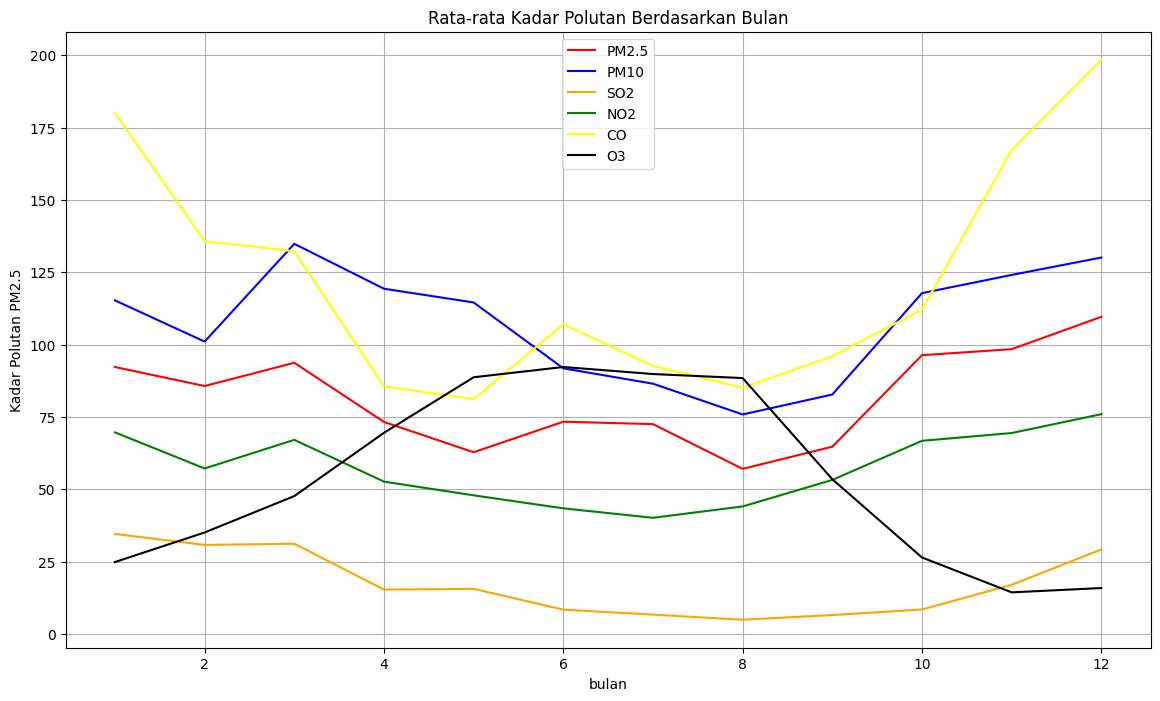

In [28]:
plt.figure(figsize=(14, 8))
guanyuan_df.groupby('month')['PM2.5'].mean().plot(kind='line', color='red', label='PM2.5')
guanyuan_df.groupby('month')['PM10'].mean().plot(kind='line', color='blue', label='PM10')
guanyuan_df.groupby('month')['SO2'].mean().plot(kind='line', color='orange', label='SO2')
guanyuan_df.groupby('month')['NO2'].mean().plot(kind='line', color='green', label='NO2')
guanyuan_df.groupby('month')['CO/10'].mean().plot(kind='line', color='yellow', label='CO')
guanyuan_df.groupby('month')['O3'].mean().plot(kind='line', color='black', label='O3')
plt.title('Rata-rata Kadar Polutan Berdasarkan Bulan')
plt.xlabel('bulan')
plt.ylabel('Kadar Polutan PM2.5')
plt.legend()
plt.grid(True)
plt.show()

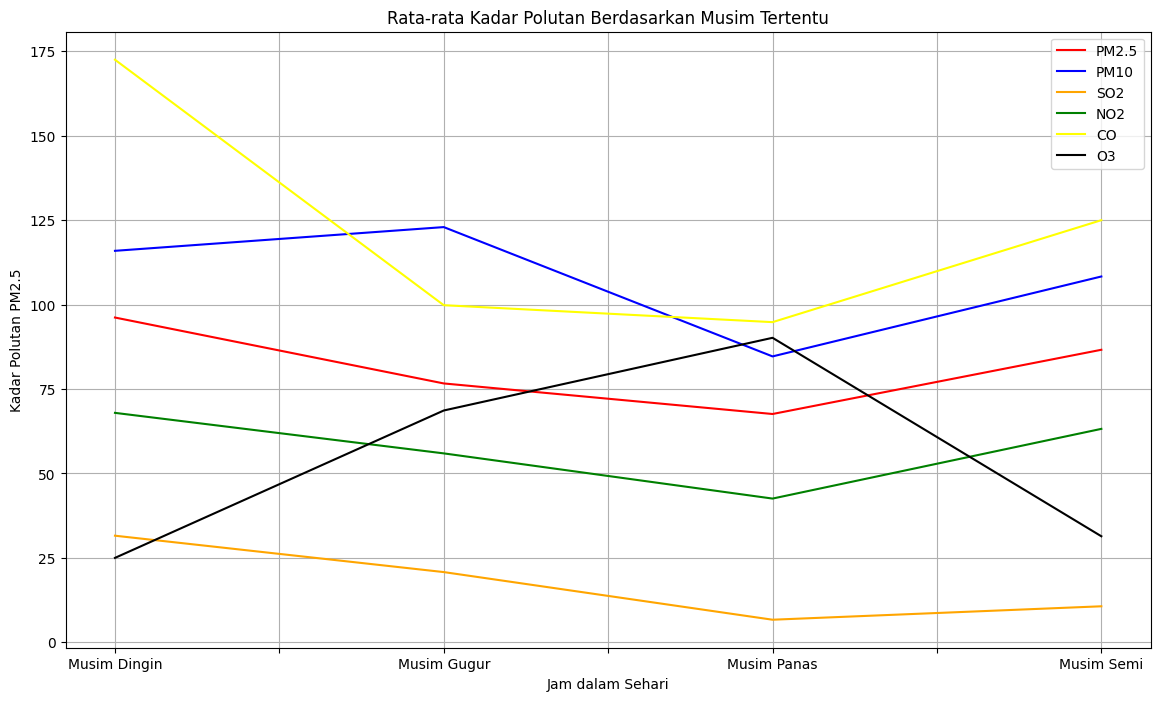

In [30]:
plt.figure(figsize=(14, 8))
guanyuan_df.groupby('season')['PM2.5'].mean().plot(kind='line', color='red', label='PM2.5')
guanyuan_df.groupby('season')['PM10'].mean().plot(kind='line', color='blue', label='PM10')
guanyuan_df.groupby('season')['SO2'].mean().plot(kind='line', color='orange', label='SO2')
guanyuan_df.groupby('season')['NO2'].mean().plot(kind='line', color='green', label='NO2')
guanyuan_df.groupby('season')['CO/10'].mean().plot(kind='line', color='yellow', label='CO')
guanyuan_df.groupby('season')['O3'].mean().plot(kind='line', color='black', label='O3')
plt.title('Rata-rata Kadar Polutan Berdasarkan Musim Tertentu')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Kadar Polutan PM2.5')
plt.legend()
plt.grid(True)
plt.show()

# **Apakah ada hubungan yang kuat antara kecepatan angin dengan konsentrasi polutan?**



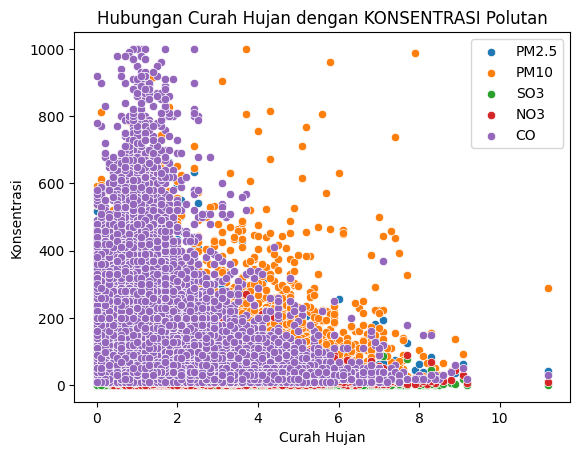

In [31]:
sns.scatterplot(x='WSPM', y='PM2.5', data=guanyuan_df, label='PM2.5')
sns.scatterplot(x='WSPM', y='PM10', data=guanyuan_df, label='PM10')
sns.scatterplot(x='WSPM', y='SO2', data=guanyuan_df, label='SO3')
sns.scatterplot(x='WSPM', y='NO2', data=guanyuan_df, label='NO3')
sns.scatterplot(x='WSPM', y='CO/10', data=guanyuan_df, label='CO')
plt.title('Hubungan Curah Hujan dengan KONSENTRASI Polutan')
plt.xlabel('Curah Hujan')
plt.ylabel('Konsentrasi')
plt.legend()
plt.show()

Curah hujan

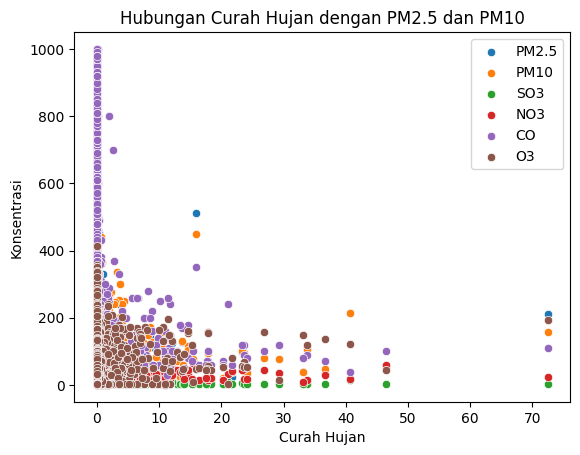

In [32]:
sns.scatterplot(x='RAIN', y='PM2.5', data=guanyuan_df, label='PM2.5')
sns.scatterplot(x='RAIN', y='PM10', data=guanyuan_df, label='PM10')
sns.scatterplot(x='RAIN', y='SO2', data=guanyuan_df, label='SO3')
sns.scatterplot(x='RAIN', y='NO2', data=guanyuan_df, label='NO3')
sns.scatterplot(x='RAIN', y='CO/10', data=guanyuan_df, label='CO')
sns.scatterplot(x='RAIN', y='O3', data=guanyuan_df, label='O3')
plt.title('Hubungan Curah Hujan dengan PM2.5 dan PM10')
plt.xlabel('Curah Hujan')
plt.ylabel('Konsentrasi')
plt.legend()
plt.show()

# **Pada jam Berapakah yang biasanya menunjukkan kadar PM2.5, PM10, NO2 tertinggi?**

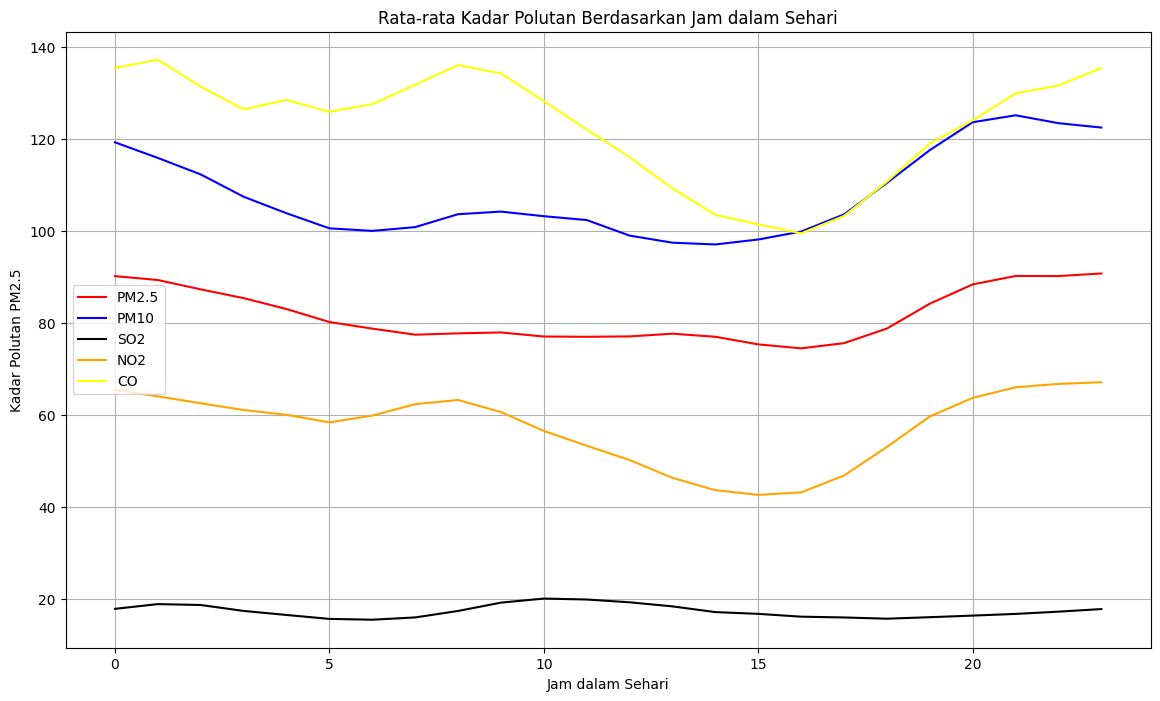

In [33]:
plt.figure(figsize=(14, 8))
guanyuan_df.groupby('hour')['PM2.5'].mean().plot(kind='line', color='red', label='PM2.5')
guanyuan_df.groupby('hour')['PM10'].mean().plot(kind='line', color='blue', label='PM10')
guanyuan_df.groupby('hour')['SO2'].mean().plot(kind='line', color='black', label='SO2')
guanyuan_df.groupby('hour')['NO2'].mean().plot(kind='line', color='orange', label='NO2')
guanyuan_df.groupby('hour')['CO/10'].mean().plot(kind='line', color='yellow', label='CO')
plt.title('Rata-rata Kadar Polutan Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Kadar Polutan PM2.5')
plt.legend()
plt.grid(True)
plt.show()

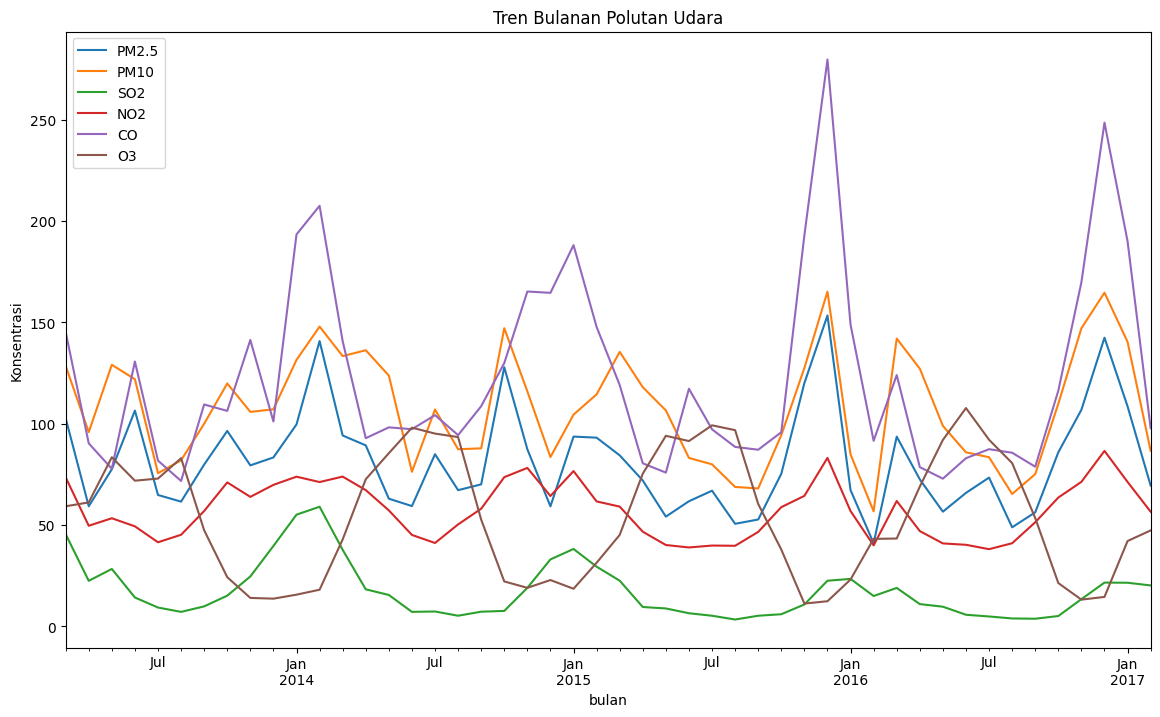

In [34]:
plt.figure(figsize=(14, 8))
guanyuan_df['PM2.5'].resample('M').mean().plot(label='PM2.5')
guanyuan_df['PM10'].resample('M').mean().plot(label='PM10')
guanyuan_df['SO2'].resample('M').mean().plot(label='SO2')
guanyuan_df['NO2'].resample('M').mean().plot(label='NO2')
guanyuan_df['CO/10'].resample('M').mean().plot(label='CO')
guanyuan_df['O3'].resample('M').mean().plot(label='O3')
plt.title('Tren Bulanan Polutan Udara')
plt.xlabel('bulan')
plt.ylabel('Konsentrasi')
plt.legend()
plt.show()

## Conclusion
1.   Apakah ada perbedaan Yang signifikan dalam kadar polutan (PM2.5, PM10, SO2, NO2, CO, O3) antara bulan-bulan atau musim tertentu?


> Dari Analysis diatas dapat disimpulkan bahwa Konsentrasi PM2.5, PM10, SO2, NO2. CO, dan O3 Meningkat Cukup Signigikan Pada Awal Dan Akhir tahun yang merupakan musim dingin, dan menurun pada pertengahan tahun pada musim panas.
hal ini bisa disebabkan oleh penghangat ruangan yang digunakan pada saat musim dingin seperti pembakaran kayu, Batubara, dan penggunaan AC yang berlebihan pada musim dingin sehingga kadar polutan Meningkat



2.   Apakah ada hubungan yang kuat antara kecepatan angin dengan konsentrasi polutan?


> ya, terdapat hubungan antara kecepatan angin dan konsentrasi polutan yang berbanding terbalik, saat kecepatan angin meningkat konsentrasi polutan akan semakin rendah karena terbawa dan terpecah oleh angin yang ada.



3.  Bagaimana curah hujan mempengaruhi kadar polutan, terutama PM2.5 dan PM10?



> Sama seperti Kacepatan angin sebelumnya, curah hujan juga sangat mempengaruhi konsentrasi dari polutan yang ada semakin tinggi curah hujan maka konsentrasi polusi di udara akan semakin menipis.



4.   Pada jam Berapakah yang biasanya menunjukkan Puncak Konsentreasi PM2.5, PM10, NO2, SO2, CO tertinggi?



> Puncaknya ada pada jam 15:00 sampai 23:00 yang merupakan jam pulang kerja dimana banyak sekali aktifitas yang ada. dan juga ada peningkatan  dari jam 5:00 sampai jam 10:00 yang mana ini juga merupakan jam orang orang memulai aktifitas


5. Bagaimana PM2.5, PM10, NO2, SO2, dan CO mempengaruhi O3


> Dari analisis diatas O3(ozon) Berbanding terbalik dengan polutan yang ada seperti (PM2.5, PM10, NO2, SO2, dan CO) dimana saat kadar polutan meningkat Justru O3 (ozon) Menipis dan sebaliknya




In [36]:
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,season,CO/10
date,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,Musim Gugur,30.0
2013-03-01 01:00:00,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,Musim Gugur,30.0
2013-03-01 02:00:00,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,Musim Gugur,30.0
2013-03-01 03:00:00,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,Musim Gugur,40.0
2013-03-01 04:00:00,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,Musim Gugur,40.0


In [38]:
all_df = guanyuan_df

In [40]:
all_df.to_csv("all_data.csv", index=False)